# Regularization in LR

#### TL; DR
Develop a deeper intuitive understanding of regularization w.r.t. to LR and transcribing the math/linear algebra into code

### L1 & L2 (Lasso & Ridge)

- Norms: distances 
- L1 is absolute (Manhattan distance), geometrically forcing coefficients that do not contribute variance-wise to zero (feature reduction) 
- L2 is squared  (Euclidean distance), geometrically shrink insignificant variables (overfitting reduction)

---
## L2 (Ridge)

Cost function $J$ minimize the sum of squared residuals with a penalty term $\lambda |w|^2$

$$J=\sum_{i=1}^N(y_{n}-\hat{y_{n}})^2+\lambda|w|^2$$

such that $|w|^2=w^T w=w_{1}^2+w_{2}^2+...+w_{D}^2$ where the regularization term is equivalent to $\lambda w^T w$

### Cost Function and Solving for w (coefficient(s))

$$J=(Y-Xw)^T(Y-Xw)+\lambda w^Tw$$

Take the derivative of the cost function $J$ w.r.t. $w$ and set to 0

$$\frac{\partial J}{\partial w}=-2X^T Y +2X^T Xw +2\lambda w = 0$$ 

$$w=(\lambda I+X^{T}X)^{-1}X^{T}Y$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

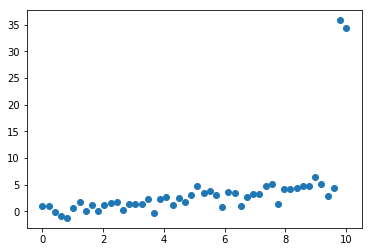

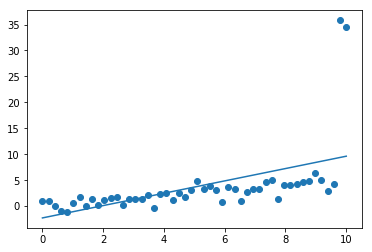

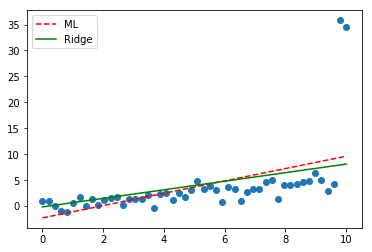

In [18]:
# Generate data
N = 50

X = np.linspace(0,10,N)
Y = 0.5*X + np.random.randn(N)

# Manufacture outliers
Y[-1] += 30
Y[-2] += 30

plt.scatter(X, Y)
plt.show()

# add constant/bias term
X = np.vstack([np.ones(N), X]).T

# MLE = OLS
w_ml = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
Yhat_ml = X.dot(w_ml)

plt.scatter(X[:,1], Y)
plt.plot(X[:,1], Yhat_ml)
plt.show()

# L2 (Ridge)
lam = 100

w_l2 = np.linalg.solve(lam * np.eye(2) + X.T.dot(X), X.T.dot(Y))
Yhat_l2 = X.dot(w_l2)

plt.scatter(X[:,1], Y)
plt.plot(X[:,1], Yhat_ml, color='r', ls='--', label=f'ML')
plt.plot(X[:,1], Yhat_l2, color='g', label=f'Ridge')
plt.legend()
plt.show()

In [23]:

np.eye(cols)

array([[1., 0.],
       [0., 1.]])

In [69]:
class RidgeRegression():
    
    def transform(self, X):
        return np.vstack([np.ones(len(X)), X]).T
    
    def fit(self, X, Y, lam=100):
        self.X = self.transform(X)
        _, cols = self.X.shape
        self.w = np.linalg.solve(lam*np.eye(cols) + self.X.T.dot(self.X), self.X.T.dot(Y))
    
    def predict(self, X):
        self.X = self.transform(X)
        self.Yhat = self.X.dot(self.w)
        return self.Yhat
    
    def r2_score(self, Y):
        SSR = Y - self.Yhat
        SST = Y - Y.mean()
        self.r2 = 1 - (SSR.dot(SSR)/SST.dot(SST))
        return self.r2

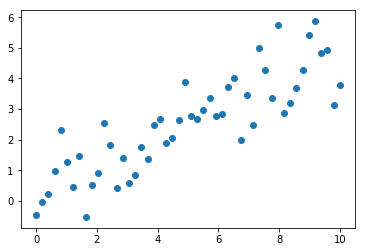

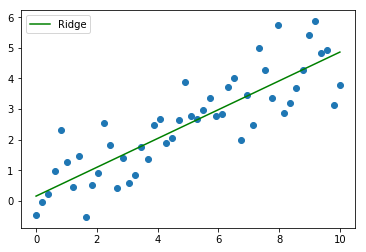

In [70]:
# Generate data
N = 50

X_r = np.linspace(0,10,N)
Y_r = 0.5*X_r + np.random.randn(N)

# Manufacture outliers
Y_r[-1] += np.random.randn(1)
Y_r[-2] += np.random.randn(1)

plt.scatter(X_r, Y_r)
plt.show()

ridge_test = RidgeRegression()
ridge_test.fit(X_r, Y_r, 10)
ridge_preds = ridge_test.predict(X_r)
ridge_test.r2_score(Y_r)

plt.scatter(X_r, Y_r)
plt.plot(X_r, ridge_preds, color='g', label=f'Ridge')
plt.legend()
plt.show()

# ridge_test = RidgeRegression()
# plt.scatter(X_r, Y_r)
# for i in range(1,10,100):
#     ridge_test.fit(X_r, Y_r, i)
#     preds = ridge_test.predict(X_r)
#     plt.plot(X_r, preds, ls='--')
# plt.show()

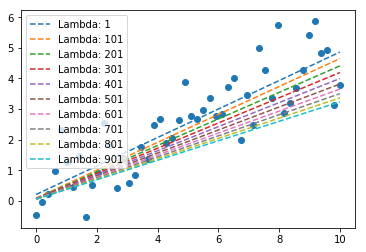

In [76]:
ridge_temp = RidgeRegression()
plt.scatter(X_r, Y_r)
for i in range(1,1000,100):
    ridge_temp.fit(X_r, Y_r, i)
    temp_preds = ridge_temp.predict(X_r)
    plt.plot(X_r, temp_preds, ls='--', label=f'Lambda: {i}')
plt.legend()
plt.show()

---
## L1 (Lasso)

*Lasso is popular as a feature reduction regression algorithm*

The cost function for Lasso is:

$$J_{LASSO}=\sum_{n=1}^N (y_{n}-\hat{y_{n}})^2 +\lambda||w||_{1}$$

where the regularization/penalty term is $\lambda||w||_{1}$$ and unlike Ridge's squared penalty term is an absolute value.

### The Derivation

$$J=(Y-Xw)^T(Y-Xw)+\lambda|w|$$

$$\frac{\partial{J}}{\partial{w}}=-2X^T Y+2X^T Xw +\lambda sign(w)=0$$

where $sign(x)=1$ if $x>0$, -1 if $x<0$, 0 if $x=0$

We need to perform Gradient Descent to find $w$ (coefficients)

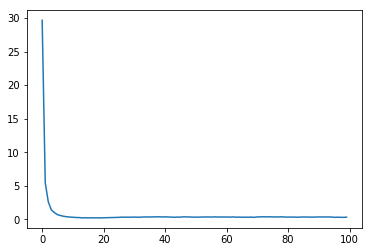

final w: [ 9.55541331e-01  4.70399967e-01 -4.41712091e-01  4.66623029e-03
  7.29910775e-03  1.17532826e-02  2.00528033e-03  5.30359428e-03
 -1.25248685e-02  1.53982247e-03 -2.62354025e-02  5.27654950e-04
 -1.42825814e-02  1.24651786e-03  6.90191369e-03 -1.23251551e-02
  2.68053511e-02 -3.94732902e-03  2.11126564e-02  4.44645109e-05
  3.72223193e-03 -1.57549177e-03  5.19946101e-03  6.10472494e-03
  2.92862335e-02 -1.18993081e-02 -1.96025175e-02 -1.45715852e-02
  1.42180692e-02 -1.32425952e-02 -9.84895795e-03 -1.22747395e-02
  6.09340909e-03 -1.00785540e-02  1.19846179e-02 -9.32990776e-03
  1.84400120e-02 -1.04927049e-02  1.54750276e-03 -1.66575099e-02
  1.48595011e-02 -1.63728537e-02 -1.19523775e-02  3.59251382e-02
 -2.85279275e-03 -3.79104209e-03  4.57477004e-04 -2.13210836e-02
  2.55491829e-03 -1.44865173e-02] 50


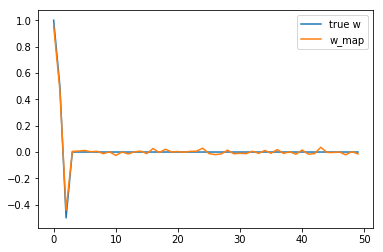

In [86]:
N = 50
D = 50

# uniformly distributed numbers between -5 & +5
X = (np.random.random((N, D)) - 0.5)*10

# the true weights - only the first 3 dimensions of X affect Y
true_w = np.array([1, 0.5, -0.5] + [0]*(D-3))

# generate Y - add noise
Y = X.dot(true_w) + np.random.randn(N)*0.5

# perform gradient descent to find w
costs = [] # keep track of squared error cost
w = np.random.randn(D) / np.sqrt(D) # randomly initialize w

learning_rate = 0.001
l1 = 10.0 
l1_ls = [5.0, 2.0, 1.0, 0.1]

for t in range(100):
    Yhat = X.dot(w) # update w
    delta = Yhat - Y
    # gradient descent
    w = w - learning_rate*(X.T.dot(delta) + l1*np.sign(w))
    
    # find and store the cost
    mse = delta.dot(delta) / N
    costs.append(mse)

# plot the costs
plt.plot(costs)
plt.show()

print("final w:", w, len(w))

# plot our w v. true w
plt.plot(true_w, label='true w')
plt.plot(w, label='w_map')
plt.legend()
plt.show()

## Elastic Net (Combination of L1 & L2)

- Combination of both L1 & L2

$$J_{RIDGE}=J+\lambda_{2}|w|^2$$
$$J_{LASSO}=J+\lambda_{1}|w|$$
$$J_{ELASTIC\ NET}=J+\lambda_{1}|w|+\lambda_{2}|w|^2$$

In [98]:
class LassoRegression:
    
    def fit(self, X, Y, learn_rate=0.01, lam=10):
        _, D = X.shape
        self.w = np.random.randn(D) / np.sqrt(D) # initialize weights
        costs = [] # keep track of squared error cost
        self.iters = 100
        for i in range(self.iters):
            Yhat = X.dot(self.w)
            delta = Yhat - Y
            self.w = self.w - learning_rate*(X.T.dot(delta) + l1*np.sign(self.w))
            # find and store the cost
            mse = delta.dot(delta) / N
            costs.append(mse)
            
    def predict(self, X):
        self.Yhat = X.dot(self.w)
        return self.Yhat
    
    def r2_score(self, Y):
        SSR = Y - self.Yhat
        SST = Y - Y.mean()
        r2 = 1 - (SSR.dot(SSR)/SST.dot(SST))
        return r2

In [99]:
lasso_test = LassoRegression()
lasso_test.fit(X, Y)
lasso_test.predict(X)
lasso_test.r2_score(Y)

0.9720378108653267